In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Mencegah error pada gambar yang terpotong

train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_data_gen.flow_from_directory(
    'Dataset/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    'Dataset/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Lanjutkan dengan model seperti sebelumnya


Found 3267 images belonging to 2 classes.
Found 816 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.8152 - loss: 0.4823 - val_accuracy: 0.7563 - val_loss: 0.5463
Epoch 2/10
  1/102 ━━━━━━━━━━━━━━━━━━━━ 2:36 2s/step - accuracy: 0.8438 - loss: 0.3769

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.3769 - val_accuracy: 0.8750 - val_loss: 0.3327
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8592 - loss: 0.3721 - val_accuracy: 0.7513 - val_loss: 0.6501
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2891 - val_accuracy: 0.6250 - val_loss: 0.7871
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8669 - loss: 0.3323 - val_accuracy: 0.7475 - val_loss: 0.6280
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 0.6270 - val_accuracy: 0.6250 - val_loss: 1.0879
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8870 - loss: 0.2863 - val_accuracy: 0.6988 - val_loss: 0.8022
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8750 - loss: 0.3780 - val_accuracy: 0.6875 - val_loss: 0.9258
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9003 - loss: 0.2711 - val_accuracy: 0.7400 - 

In [10]:
# 5. Menyimpan Model untuk Penggunaan di Masa Depan
model.save('model_klasifikasi_retak_xray.h5')

# Jika ingin memuat model yang sudah disimpan
model = tf.keras.models.load_model('model_klasifikasi_retak_xray.h5')

In [11]:
# 6. Fungsi untuk Memprediksi Gambar Baru
def prepare_image(file_path):
    img = image.load_img(file_path, target_size=(150, 150))  # Ubah ukuran citra
    img_array = image.img_to_array(img)  # Konversi citra menjadi array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


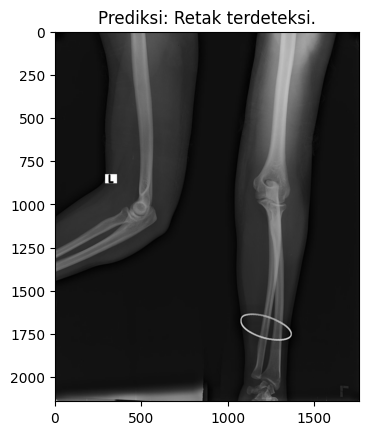

Prediksi: Retak terdeteksi.


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image  # Pastikan ini diimpor
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Mengatasi gambar yang terpotong

# 1. Load Model yang sudah dilatih
model = load_model('model_klasifikasi_retak_xray.h5')

# 2. Fungsi untuk memproses citra sebelum prediksi
def prepare_image(file_path):
    img = image.load_img(file_path, target_size=(150, 150))  # Ubah ukuran citra
    img_array = image.img_to_array(img)  # Konversi citra ke array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi piksel
    return img_array

# 3. Melakukan Prediksi
file_path = 'tulang3.jpg'  # Path gambar X-ray baru yang akan diprediksi
new_image = prepare_image(file_path)
prediction = model.predict(new_image)

# Interpretasi hasil prediksi
if prediction[0] > 0.5:
    result = "Prediksi: Retak terdeteksi."
else:
    result = "Prediksi: Tidak ada retak."

# Menampilkan hasil prediksi
img = image.load_img(file_path)
plt.imshow(img)
plt.title(result)
plt.show()

print(result)  # Juga mencetak hasil di console
